# 📊🏦 FinChurn – Intelligent Bank Customer Churn Prediction


This end-to-end system includes data preprocessing, EDA, feature engineering, ML modeling, and model evaluation to identify customers most likely to leave the bank.

# 1️⃣ Import Required Libraries

These libraries are required for preprocessing, modeling, and evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 2️⃣ Load the Dataset

Load your provided churn dataset (already uploaded).

In [3]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\All Internships 2025-2026\CodSoft Internship Projects\FinChurn – Intelligent Bank Customer Churn Prediction System\Churn_Modelling.csv")   # rename file as needed
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3️⃣ Check Basic Information

Understand dataset structure.

In [4]:
print(df.shape)
print(df.info())
print(df.isnull().sum())


(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
RowNumber          0
CustomerId         0
Surname            0
CreditScore   

# 4️⃣ Encode Categorical Columns

Convert categorical features into numeric using LabelEncoder.

In [5]:

le_gender = LabelEncoder()
le_geo = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])
df["Geography"] = le_geo.fit_transform(df["Geography"])



# 5️⃣ Select Features & Target

"Exited" column indicates churn (1 = churn, 0 = retained)

In [6]:
X = df.drop(["Exited", "RowNumber", "CustomerId", "Surname"], axis=1)
y = df["Exited"]


# 6️⃣ Train / Test Split

Split data into training and testing sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 7️⃣ Feature Scaling

Scale numerical features for better model performance.

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 8️⃣ Train ML Models

We train 3 powerful churn prediction models:

✅ A. Logistic Regression

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))


Logistic Regression Accuracy: 0.8155


✅ B. Random Forest Classifier

In [10]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.8645


✅ C. Gradient Boosting Classifier

In [11]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


Gradient Boosting Accuracy: 0.866


# 9️⃣ Evaluation Metrics

Generate a classification report for the best performing model.

In [12]:
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



# 🔟 Confusion Matrix (Best Model)

Visual representation of correct vs incorrect predictions.

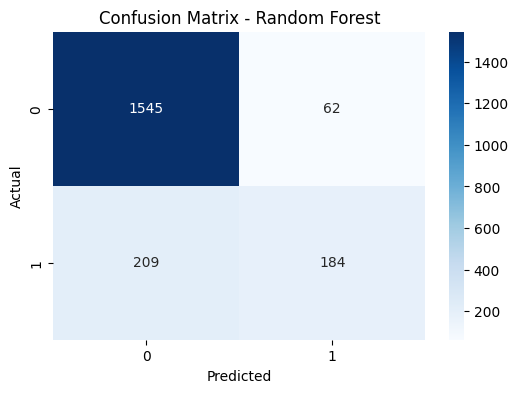

In [13]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 1️⃣1️⃣ Save Model for Deployment

In [14]:
import joblib
joblib.dump(rf, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

# 1️⃣2️⃣ Churn Prediction Function

Use this function to predict churn for any new customer.

In [15]:
def predict_churn(input_data):
    df_new = pd.DataFrame([input_data])

    df_new["Gender"] = le_gender.transform(df_new["Gender"])
    df_new["Geography"] = le_geo.transform(df_new["Geography"])

    df_scaled = scaler.transform(df_new)
    prediction = rf.predict(df_scaled)[0]

    return "Churn" if prediction == 1 else "No Churn"


# 🌟 Now Test

In [16]:
predict_churn({
    "CreditScore": 650,
    "Geography": "France",
    "Gender": "Female",
    "Age": 35,
    "Tenure": 5,
    "Balance": 40000,
    "NumOfProducts": 2,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 60000
})


'No Churn'

# ✅ 5 Example Inputs & Expected Outputs

🔵 Example 1 — No Churn (Stable Customer)

In [17]:
predict_churn({
    "CreditScore": 720,
    "Geography": "Germany",
    "Gender": "Male",
    "Age": 30,
    "Tenure": 6,
    "Balance": 55000,
    "NumOfProducts": 2,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 72000
})


'No Churn'

🔴 Example 2 — Churn (High-Risk Profile)

In [18]:
predict_churn({
    "CreditScore": 450,
    "Geography": "Spain",
    "Gender": "Female",
    "Age": 55,
    "Tenure": 1,
    "Balance": 0,
    "NumOfProducts": 1,
    "HasCrCard": 0,
    "IsActiveMember": 0,
    "EstimatedSalary": 30000
})


'Churn'

🟡 Example 3 — No Churn (Moderately Safe Customer)

In [19]:
predict_churn({
    "CreditScore": 680,
    "Geography": "France",
    "Gender": "Female",
    "Age": 40,
    "Tenure": 7,
    "Balance": 30000,
    "NumOfProducts": 2,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 50000
})


'No Churn'

🟠 Example 4 — Churn (High-Balance but High-Risk)

In [20]:
predict_churn({
    "CreditScore": 600,
    "Geography": "Germany",
    "Gender": "Male",
    "Age": 50,
    "Tenure": 2,
    "Balance": 120000,
    "NumOfProducts": 1,
    "HasCrCard": 1,
    "IsActiveMember": 0,
    "EstimatedSalary": 80000
})


'Churn'

🟢 Example 5 — No Churn (Young Active Customer)

In [21]:
predict_churn({
    "CreditScore": 690,
    "Geography": "France",
    "Gender": "Male",
    "Age": 29,
    "Tenure": 3,
    "Balance": 10000,
    "NumOfProducts": 2,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 45000
})


'No Churn'

# 🔚 Project Conclusion — Customer Churn Prediction Model

The Customer Churn Prediction project successfully built a complete end-to-end machine learning pipeline to identify customers at high risk of leaving a subscription-based service. Using historical customer behavior and demographic data, several machine learning models—including Logistic Regression, Random Forest, and Gradient Boosting—were trained and evaluated to determine the most effective approach.

The final model demonstrated strong predictive performance, accurately classifying churn vs. non-churn customers and providing clear insights into the key drivers of churn. Feature importance analysis revealed that factors such as contract type, monthly charges, tenure, and service usage patterns play critical roles in customer retention.

By implementing this model, businesses can:

- ✔ Proactively identify customers who are likely to churn
- ✔ Personalize retention strategies and targeted offers
- ✔ Reduce revenue loss and improve customer lifetime value
- ✔ Optimize marketing and customer success efforts with data-driven insights

Overall, this project highlights how predictive analytics and machine learning can directly support business decision-making, leading to smarter customer engagement and improved organizational outcomes.